In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
%matplotlib inline


def prior_C_equals_1(x_v, x_a, params):
    sigma_squared_sum = (params.sigma_v ** 2 * params.sigma_a ** 2
                         + params.sigma_v ** 2 * params.sigma_p ** 2
                         + params.sigma_a ** 2 * params.sigma_p ** 2)

    prefactor = 1. / (2 * np.pi * np.sqrt(sigma_squared_sum))

    exponent = -1. / 2 * (np.power(x_v - x_a, 2) * params.sigma_p ** 2
                          + np.power(x_v - params.mu_p, 2) * params.sigma_a ** 2
                          + np.power(x_a - params.mu_p, 2) * params.sigma_v ** 2) \
               / sigma_squared_sum
    return prefactor * np.exp(exponent)


def prior_C_equals_2(x_v, x_a, params):
    prefactor = 1. / (
        2 * np.pi * np.sqrt((params.sigma_v ** 2 + params.sigma_p ** 2) * (params.sigma_a ** 2 + params.sigma_p ** 2)))
    exponent = -1. / 2 * ((np.power(x_v - params.mu_p, 2) / (params.sigma_v ** 2 + params.sigma_p ** 2)
                           + np.power(x_a - params.mu_p, 2) / (params.sigma_a ** 2 + params.sigma_p ** 2)))
    return prefactor * np.exp(exponent)


def posterior_C_equals_1(x_v, x_a, params):
    return prior_C_equals_1(x_v, x_a, params) * params.p_common / \
           (prior_C_equals_1(x_v, x_a, params) * params.p_common
            + prior_C_equals_2(x_v, x_a, params) * (1 - params.p_common))

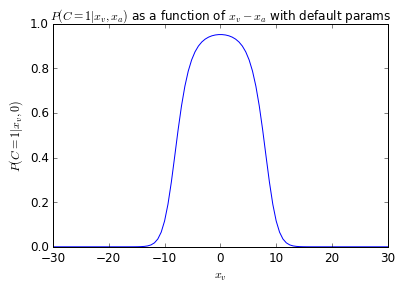

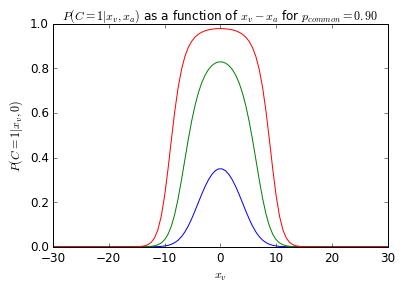

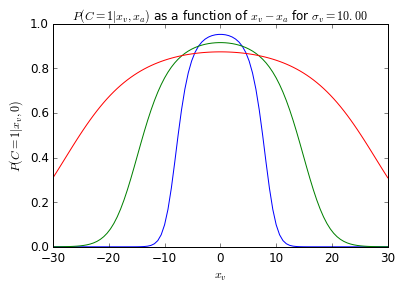

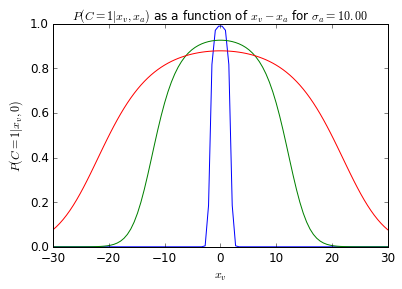

/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


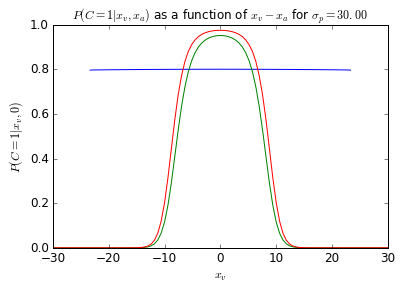

In [2]:
params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

# --------------

x_a = 0
x_vs = np.linspace(-30,30,100)
probs = np.zeros_like(x_vs)
for i, x_v in enumerate(x_vs):
    probs[i] = posterior_C_equals_1(x_v, x_a, params)
    
plt.plot(x_vs, probs)
plt.xlabel('$x_v$')
plt.ylabel('$P(C=1 | x_v, 0)$')
plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ with default params')
plt.show()

#----------------
p_commons = np.linspace(0.1,0.9,3)
for p_common in p_commons:
    params.p_common = p_common
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $p_{{common}}={0:.2f}$'.format(p_common))
plt.show()

params.p_common = 0.8
#----------------

sigma_vs = np.linspace(0.1,10,3)
for sigma_v in sigma_vs:
    params.sigma_v = sigma_v
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{v}}={0:.2f}$'.format(sigma_v))
plt.show()
params.sigma_v = 0.6

#----------------

sigma_as = np.linspace(0.1,10,3)
for sigma_a in sigma_as:
    params.sigma_a = sigma_a
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{a}}={0:.2f}$'.format(sigma_a))
plt.show()
params.sigma_a = 3.1

#----------------

sigma_ps = np.linspace(0.1,30,3)
for sigma_p in sigma_ps:
    params.sigma_p = sigma_p
    probs = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        probs[i] = posterior_C_equals_1(x_v, x_a, params)

    plt.plot(x_vs, probs)
    plt.xlabel('$x_v$')
    plt.ylabel('$P(C=1 | x_v, 0)$')
    plt.title('$P(C=1 | x_v, x_a)$ as a function of $x_v - x_a$ for $\sigma_{{p}}={0:.2f}$'.format(sigma_p))
plt.show()
params.sigma_p = 15


$p_{common}$ does this bla bla

In [3]:
def estimated_s_v_when_C_equals_2(x_v, params):
    return (x_v / params.sigma_v * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_v ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_a_when_C_equals_2(x_a, params):
    return (x_a / params.sigma_a * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_a ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_when_C_equals_1(x_a, x_v, params):
    return (x_a / params.sigma_a * 2 + x_v / params.sigma_v * 2 + params.mu_p / params.sigma_p ** 2) / \
           (1. / params.sigma_a ** 2 + 1. / params.sigma_v ** 2 + 1. / params.sigma_p ** 2)


def estimated_s_v(x_v, x_a, params):
    return posterior_C_equals_1(x_v, x_a, params) * estimated_s_when_C_equals_1(x_a, x_v, params) + \
           (1 - posterior_C_equals_1(x_v, x_a, params)) * estimated_s_v_when_C_equals_2(x_v, params)


def estimated_s_a(x_v, x_a, params):
    return posterior_C_equals_1(x_v, x_a, params) * estimated_s_when_C_equals_1(x_a, x_v, params) + \
           (1 - posterior_C_equals_1(x_v, x_a, params)) * estimated_s_a_when_C_equals_2(x_a, params)


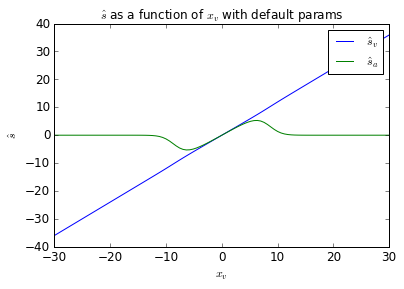

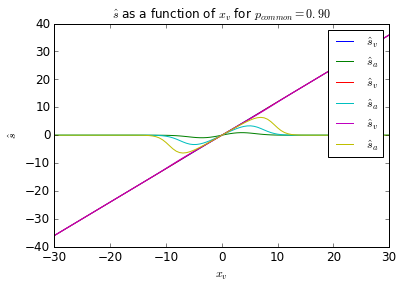

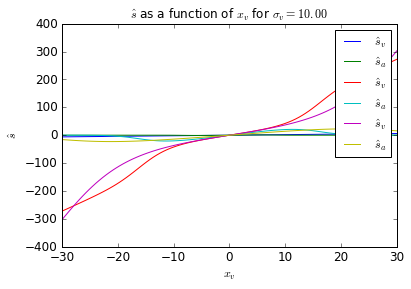

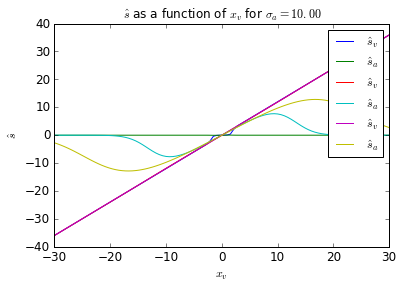

/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in double_scalars


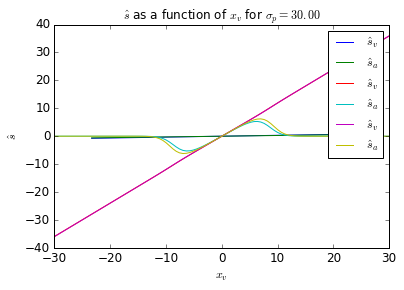

In [4]:
params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

# --------------

x_a = 0
x_vs = np.linspace(-30,30,100)
estimated_s_vs = np.zeros_like(x_vs)
estimated_s_as = np.zeros_like(x_vs)
for i, x_v in enumerate(x_vs):
    estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
    estimated_s_as[i] = estimated_s_a(x_v, x_a, params)
    
plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
plt.xlabel('$x_v$')
plt.ylabel('$\hat{s}$')
plt.title('$\hat{s}$ as a function of $x_v$ with default params')
plt.legend()
plt.show()

#----------------
p_commons = np.linspace(0.1,0.9,3)
for p_common in p_commons:
    params.p_common = p_common
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $p_{{common}}={0:.2f}$'.format(p_common))
    plt.legend()
plt.show()

params.p_common = 0.8
# #----------------

sigma_vs = np.linspace(0.1,10,3)
for sigma_v in sigma_vs:
    params.sigma_v = sigma_v
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{v}}={0:.2f}$'.format(sigma_v))
    plt.legend()
plt.show()
params.sigma_v = 0.6

# #----------------

sigma_as = np.linspace(0.1,10,3)
for sigma_a in sigma_as:
    params.sigma_a = sigma_a
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{a}}={0:.2f}$'.format(sigma_a))
    plt.legend()
plt.show()
params.sigma_a = 3.1

# #----------------

sigma_ps = np.linspace(0.1,30,3)
for sigma_p in sigma_ps:
    params.sigma_p = sigma_p
    estimated_s_vs = np.zeros_like(x_vs)
    estimated_s_as = np.zeros_like(x_vs)
    for i, x_v in enumerate(x_vs):
        estimated_s_vs[i] = estimated_s_v(x_v, x_a, params)
        estimated_s_as[i] = estimated_s_a(x_v, x_a, params)

    plt.plot(x_vs, estimated_s_vs, label='$\hat{s}_v$')
    plt.plot(x_vs, estimated_s_as, label='$\hat{s}_a$')
    plt.xlabel('$x_v$')
    plt.ylabel('$\hat{s}$')
    plt.title('$\hat{{s}}$ as a function of $x_v$ for $\sigma_{{p}}={0:.2f}$'.format(sigma_p))
    plt.legend()
plt.show()
params.sigma_p = 15


### Part II

### 2.a-c

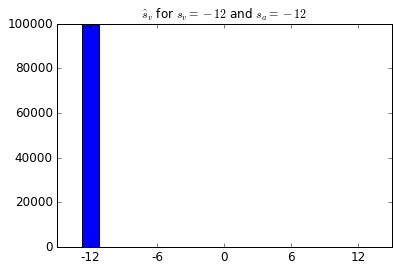

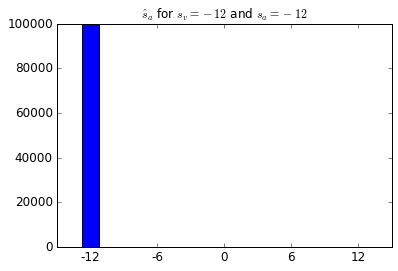

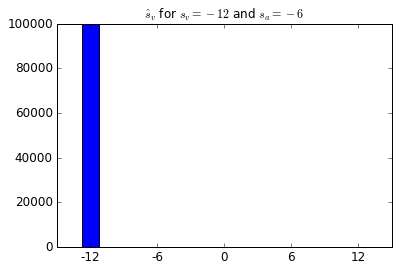

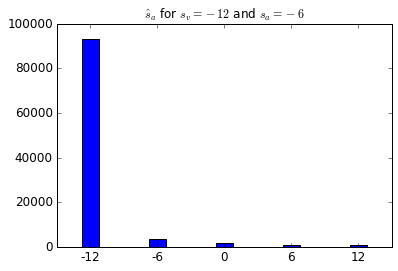

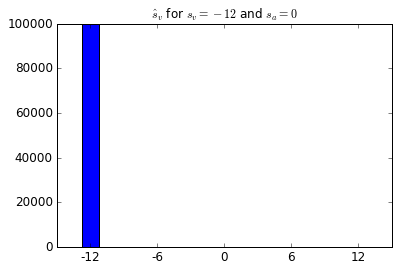

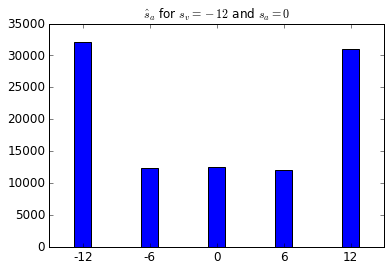

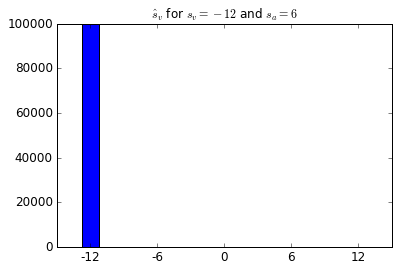

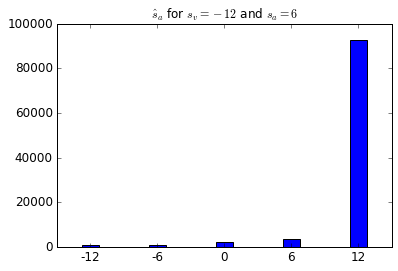

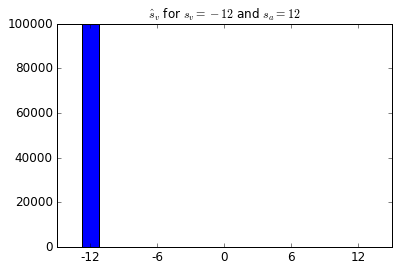

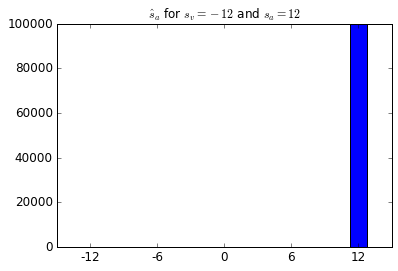

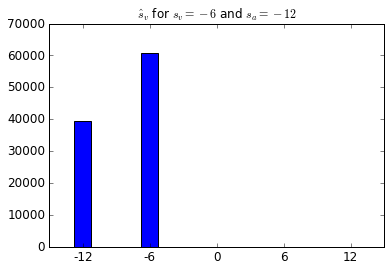

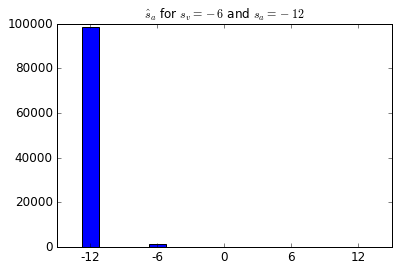

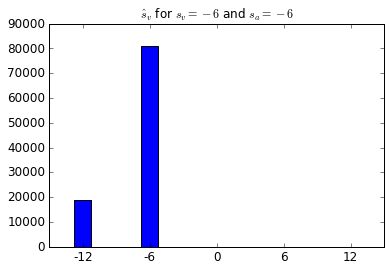

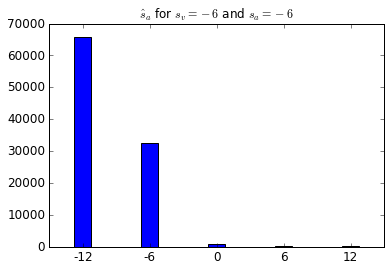

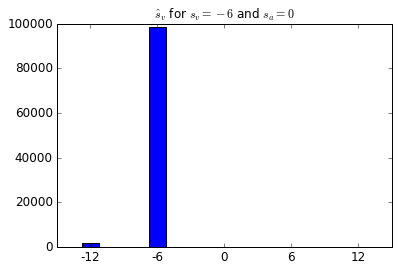

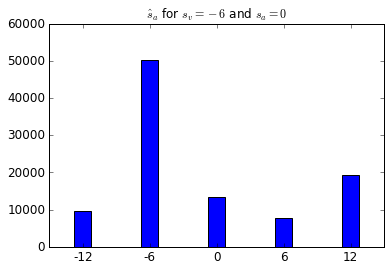

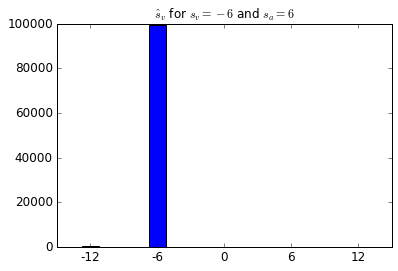

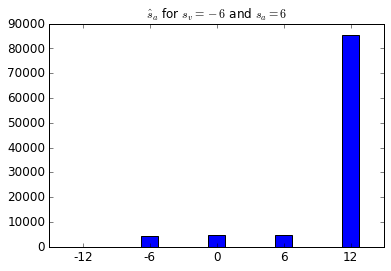

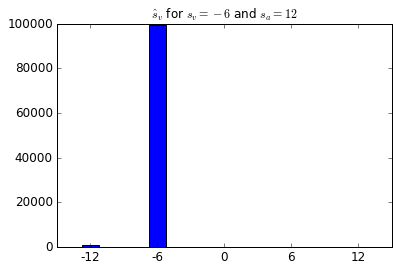

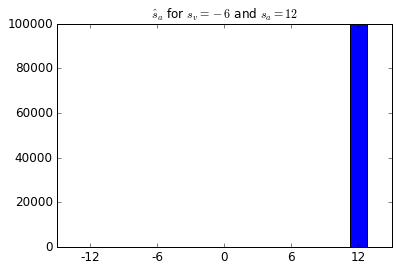

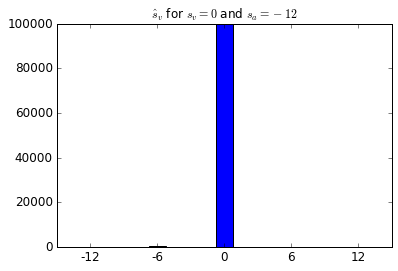

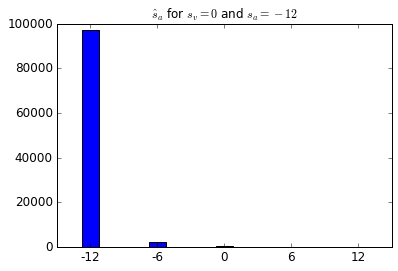

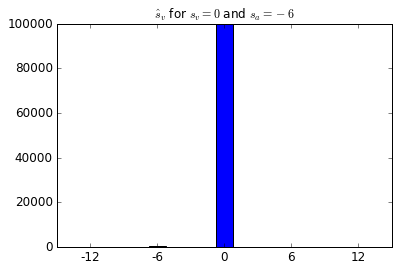

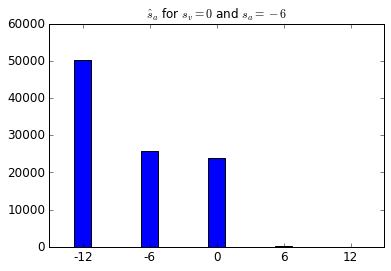

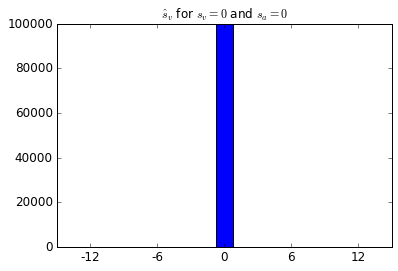

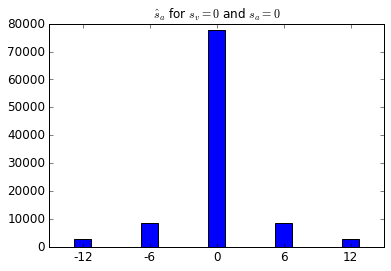

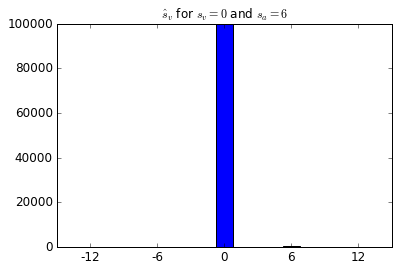

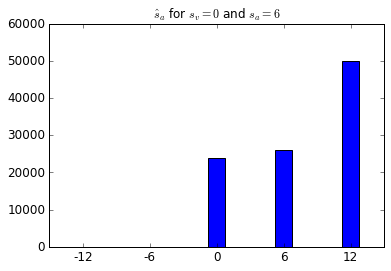

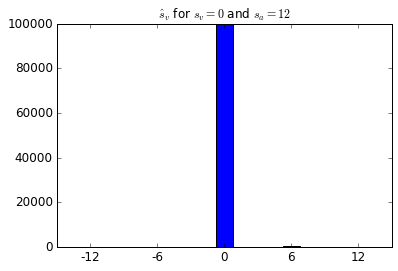

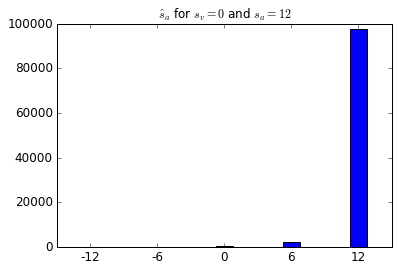

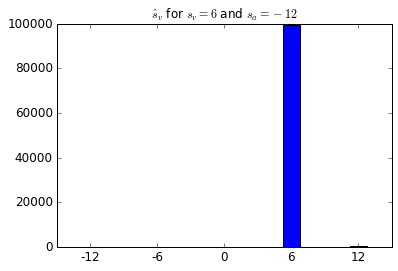

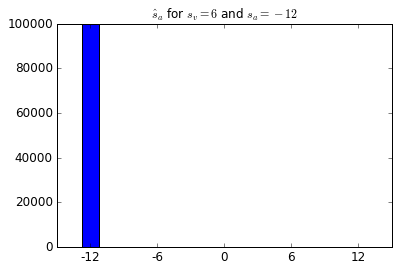

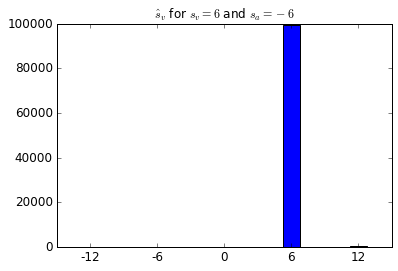

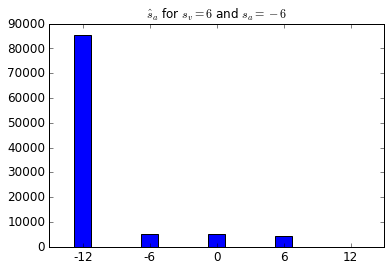

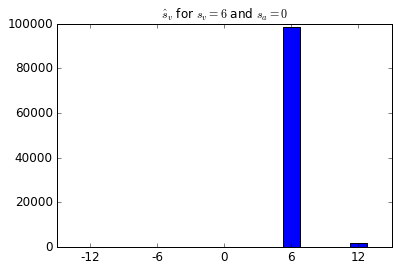

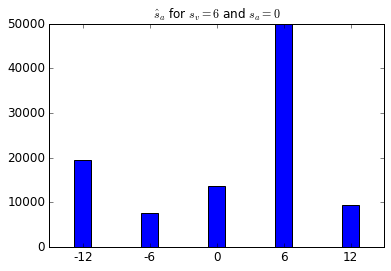

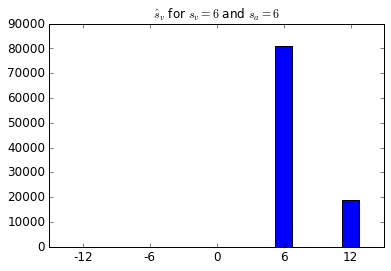

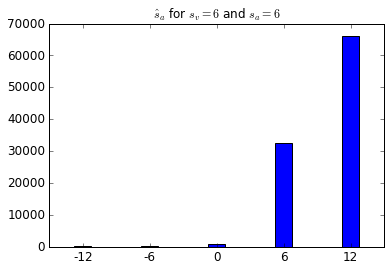

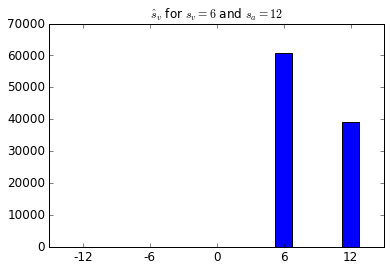

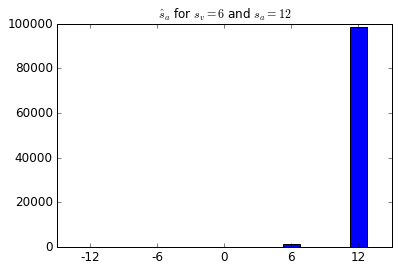

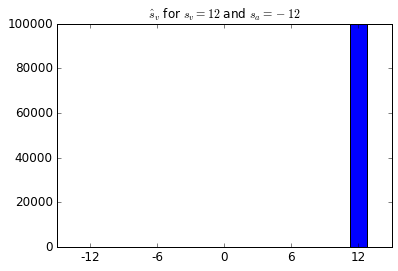

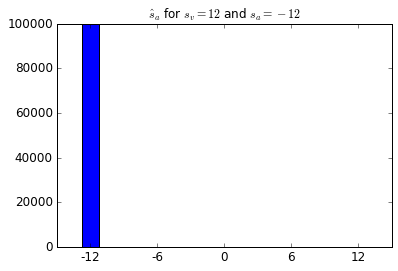

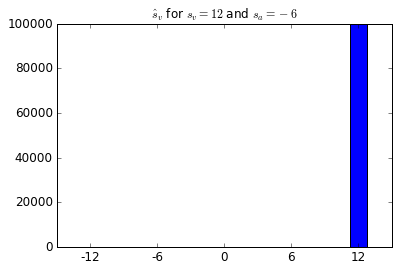

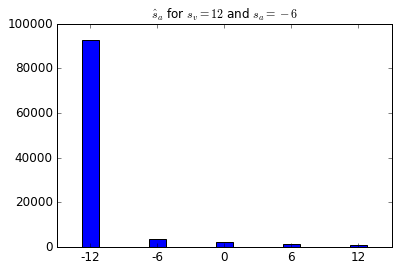

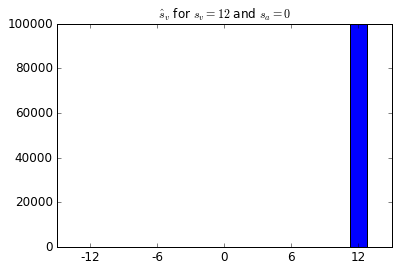

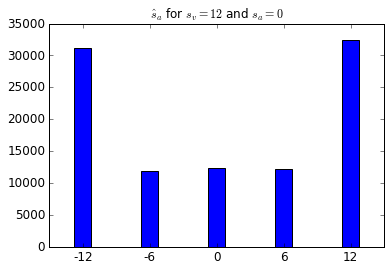

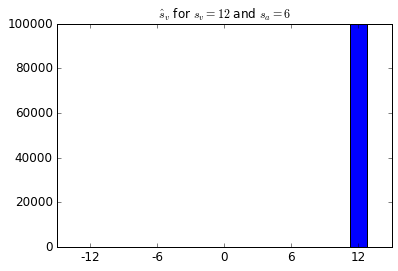

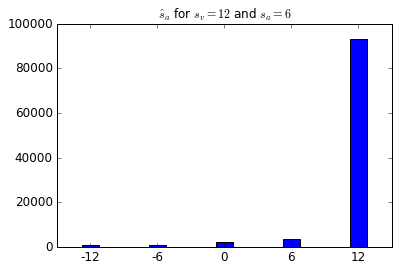

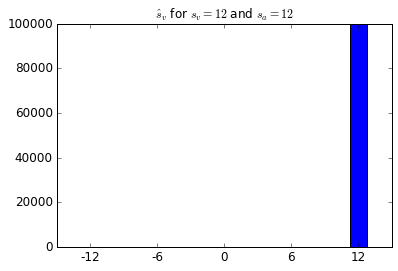

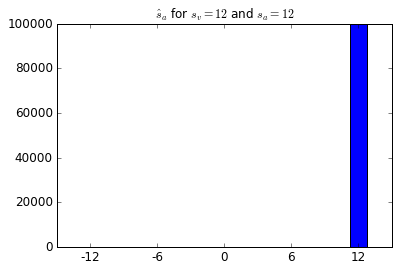

In [5]:
from itertools import product


N = int(1e5)

params = lambda: None
params.p_common = 0.8
params.sigma_v = 0.6
params.sigma_a = 3.1
params.sigma_p = 15
params.mu_p = 0

cs = np.sign(np.random.rand(N) - params.p_common) / 2. + 1.5  # only consists of 1s and 2s
is_class_1 = np.isclose(cs, 1.)
s_samples = np.random.normal(params.mu_p, params.sigma_p, (N, 2))

s_vs = s_samples[:, 0]

s_as = np.zeros((N,))
s_as[is_class_1] = s_samples[is_class_1, 0]
s_as[np.logical_not(is_class_1)] = s_samples[np.logical_not(is_class_1), 1]

def make_button_presses(N, params):
    s_set = [-12, -6, 0, 6, 12]
    for s_v, s_a in product(s_set, s_set):
        x_vs = np.random.normal(s_v, params.sigma_v, N)
        x_as = np.random.normal(s_a, params.sigma_a, N)
        estimated_s_vs = estimated_s_v(x_vs, x_as, params)
        estimated_s_as = estimated_s_a(x_vs, x_as, params)
        
        hist, bin_edges = np.histogram(estimated_s_vs, bins=[-np.inf, -9, -3, 3, 9, np.inf])
        plt.bar(s_set, hist, width = 1.5, tick_label=s_set, align='center')
        plt.title('$\hat{{s}}_v$ for $s_v={}$ and $s_a={}$'.format(s_v, s_a))
        plt.show()  
        
        hist, bin_edges = np.histogram(estimated_s_as, bins=[-np.inf, -9, -3, 3, 9, np.inf])
        plt.bar(s_set, hist, width = 1.5, tick_label=s_set, align='center')
        plt.title('$\hat{{s}}_a$ for $s_v={}$ and $s_a={}$'.format(s_v, s_a))
        plt.show()  

make_button_presses(N, params)



### 2.d-e

In [2]:
import functools

import numpy as np
import matplotlib.pyplot as plt
from itertools import product

import time

import model
%matplotlib inline


N = int(1e4)

true_params = lambda: None
true_params.p_common = 0.8
true_params.sigma_v = 0.6
true_params.sigma_a = 3.1
true_params.sigma_p = 15
true_params.mu_p = 0

cs = np.sign(np.random.rand(N) - true_params.p_common) / 2. + 1.5  # only consists of 1s and 2s
is_class_1 = np.isclose(cs, 1.)
s_samples = np.random.normal(true_params.mu_p, true_params.sigma_p, (N, 2))

s_vs = s_samples[:, 0]

s_as = np.zeros((N,))
s_as[is_class_1] = s_samples[is_class_1, 0]
s_as[np.logical_not(is_class_1)] = s_samples[np.logical_not(is_class_1), 1]


def discretize_s(s):
    bins = np.array([-np.Inf, -9, -3, 3, 9, np.Inf])
    s_index = np.digitize(s, bins)  # 1,2,3,4,5
    s = (s_index - 3) * 6
    s_index -= 1  # 0,1,2,3,4
    return s, s_index


s_as_discrete, _ = discretize_s(s_as)
s_vs_discrete, _ = discretize_s(s_vs)


def generate_experiment_data(s_vs, s_as, params):
    estimated_s_vs = np.zeros_like(s_vs)
    estimated_s_as = np.zeros_like(s_as)
    for i in range(estimated_s_vs.shape[0]):
        s_v, s_a = s_vs[i], s_as[i]
        x_vs = np.random.normal(s_v, params.sigma_v, 1)
        x_as = np.random.normal(s_a, params.sigma_a, 1)
        estimated_s_vs[i] = model.estimated_s_v(x_vs, x_as, params)
        estimated_s_as[i] = model.estimated_s_a(x_vs, x_as, params)

    estimated_s_vs, estimated_s_vs_index = discretize_s(estimated_s_vs)
    estimated_s_as, estimated_s_as_index = discretize_s(estimated_s_as)

    return estimated_s_vs, estimated_s_vs_index, estimated_s_as, estimated_s_as_index


estimated_s_vs, estimated_s_vs_index, estimated_s_as, estimated_s_as_index = generate_experiment_data(s_vs, s_as,
                                                                                                      true_params)


def calculate_pmf(params):
    N = 5 * 10 ** 4
    s_set = [-12, -6, 0, 6, 12]
    s_v_s_a_to_pmf = dict()
    x_vnoise = np.random.normal(0, params.sigma_v, N)
    x_anoise = np.random.normal(0, params.sigma_a, N)
    for s_v, s_a in product(s_set, s_set):
        x_vs = s_v + x_vnoise
        x_as = s_a + x_anoise

        estimated_s_vs, estimated_s_as = model.estimated_s_efficient(x_vs, x_as, params)

        estimated_s_vs_hist, bins = np.histogram(estimated_s_vs, bins=[-np.inf, -9, -3, 3, 9, np.inf])
        estimated_s_vs_pmf = estimated_s_vs_hist / np.sum(estimated_s_vs_hist)  # probabilities need to add up to 1
        estimated_s_as_hist, _ = np.histogram(estimated_s_as, bins=[-np.inf, -9, -3, 3, 9, np.inf])
        estimated_s_as_pmf = estimated_s_as_hist / np.sum(estimated_s_as_hist)  # probabilities need to add up to 1

        s_v_s_a_to_pmf[s_v, s_a] = estimated_s_vs_pmf, estimated_s_as_pmf
    return s_v_s_a_to_pmf

def calculate_log_likelihood(s_vs, s_as, estimated_s_vs_index, estimated_s_as_index, params):
    # a = time.time()
    s_v_s_a_to_pmf = calculate_pmf(params)
    # print('calc pmf {0:.2f}'.format(time.time() - a))

    # a = time.time()
    likelihoods = np.zeros((s_vs.shape[0], 2))
    for i in range(s_vs.shape[0]):
        s_v, s_a = s_vs[i], s_as[i]
        estimated_s_vs_pmf, estimated_s_as_pmf = s_v_s_a_to_pmf[s_v, s_a]
        likelihoods[i, 0] = estimated_s_vs_pmf[estimated_s_vs_index[i]] + 1e-5
        likelihoods[i, 1] = estimated_s_as_pmf[estimated_s_as_index[i]] + 1e-5
    log_likelihood = np.sum(np.log(likelihoods))
    # print('log likelihood {0:.2f}'.format(time.time() - a))
    return log_likelihood


#### 2.d text

It is important to generate more data in 2.d because in a real experiment, the data collected from the user is scarce, whereas the computation power is not. So it makes sense to sample more in order to get a better accuracy.

#### 2.e text

Some bins in the pmf are zero. Since np.log(0) is -Inf, this causes numerical problems. Adding an $\epsilon$ solves this problem since np.log(epsilon) is not -Inf.

The fact that some pmf bins are zero mean that for some parameters, the likelihood could be zero. In such regions, gradient methods would not work since the gradient would be zero as well.

### 2.f brute force search

0.285714285714 17.143 0.001 5.715


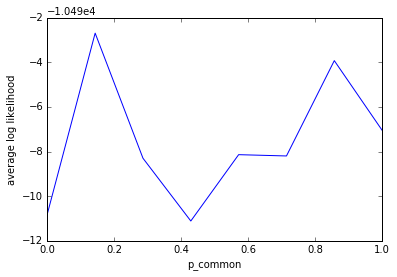

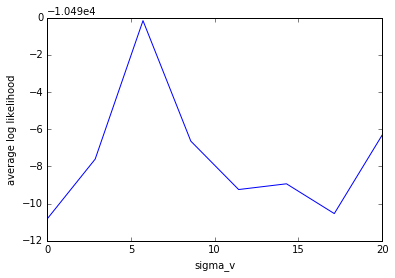

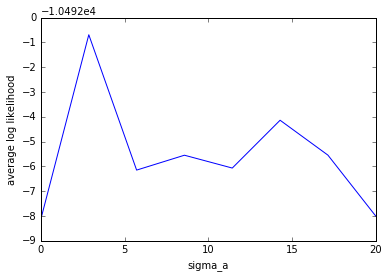

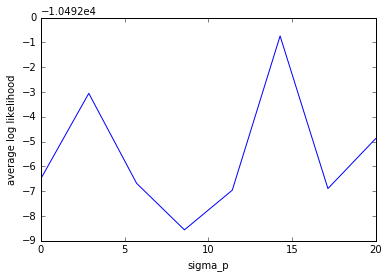

In [3]:
dim = 8
p_commons = np.linspace(0,1,dim)
sigma_vs = np.linspace(0.001, 20, dim)
sigma_as = np.linspace(0.001, 20, dim)
sigma_ps = np.linspace(0.001, 20, dim)

log_likelihoods = np.zeros((dim,dim,dim,dim))

for (i_0, p_common), (i_1, sigma_v), (i_2, sigma_a), (i_3, sigma_p) in product(enumerate(p_commons), enumerate(sigma_vs), enumerate(sigma_as), enumerate(sigma_ps)):
    params = lambda: None
    params.p_common = p_common
    params.sigma_v = sigma_v
    params.sigma_a = sigma_a
    params.sigma_p = sigma_p
    params.mu_p = 0

    a = time.time()
    log_likelihoods[i_0, i_1, i_2, i_3] = calculate_log_likelihood(s_vs_discrete, s_as_discrete, estimated_s_vs_index, estimated_s_as_index, true_params)

best_is = np.unravel_index(log_likelihoods.argmax(), log_likelihoods.shape)
print(p_commons[best_is[0]], sigma_vs[best_is[1]], sigma_as[best_is[2]], sigma_ps[best_is[3]])
log_likelihoods.dump('log_likelihoods.dump')


plt.plot(p_commons, np.apply_over_axes(np.mean, log_likelihoods, (1, 2,3)).flatten())
plt.xlabel('p_common')
plt.ylabel('average log likelihood')
plt.show()


plt.plot(sigma_vs, np.apply_over_axes(np.mean, log_likelihoods, (0, 2,3)).flatten())
plt.xlabel('sigma_v')
plt.ylabel('average log likelihood')
plt.show()


plt.plot(sigma_as, np.apply_over_axes(np.mean, log_likelihoods, (0, 1,3)).flatten())
plt.xlabel('sigma_a')
plt.ylabel('average log likelihood')
plt.show()


plt.plot(sigma_ps, np.apply_over_axes(np.mean, log_likelihoods, (0,1, 2)).flatten())
plt.xlabel('sigma_p')
plt.ylabel('average log likelihood')
plt.show()


/Users/erens/github_code/bayes_is_the_way/model.py:39: RuntimeWarning: invalid value encountered in true_divide
  + prior_C_equals_2(x_v, x_a, params) * (1 - params.p_common))


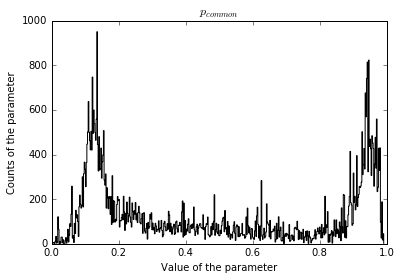

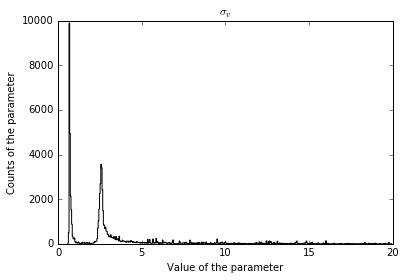

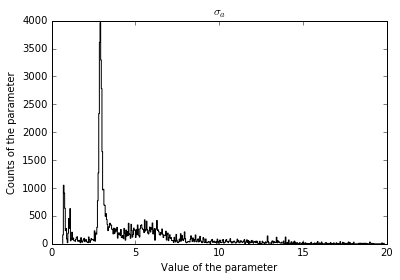

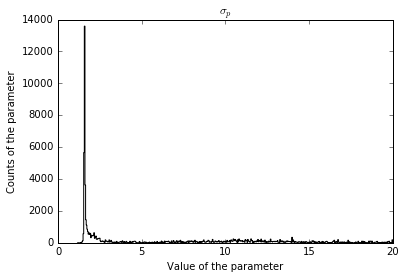

In [35]:
import emcee

def calculate_log_likelihood_wrapper(param_arr):
    param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    if not np.all(np.logical_and(param_arr > param_limits[:,0], param_arr < param_limits[:,1])):
        return -10**300
    params = lambda: None
    params.p_common = param_arr[0]
    params.sigma_v = param_arr[1]
    params.sigma_a = param_arr[2]
    params.sigma_p = param_arr[3]
    params.mu_p = 0
    t = calculate_log_likelihood(s_vs_discrete, s_as_discrete, estimated_s_vs_index, estimated_s_as_index, params)
    if np.isnan(t):
        return -np.Inf
    else:
        return t
    
def mcmc(dump_name):
    ndim = 4
    # param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    nwalkers = ndim**4
    start = np.random.uniform(0.001,20,(nwalkers,ndim))
    start[:,0] = np.random.uniform(0,1,(nwalkers))
    sampler = emcee.EnsembleSampler(nwalkers, ndim, calculate_log_likelihood_wrapper)
    pos, prob, state = sampler.run_mcmc(start, 25)
    sampler.reset()
    sampler.run_mcmc(pos, 250)
    dimensions =['$p_{common}$', '$\sigma_v$','$\sigma_a$', '$\sigma_p$']
    for i in range(ndim):
        plt.figure()
        plt.hist(sampler.flatchain[:,i], 500, color="k", histtype="step")
        plt.title(dimensions[i])
        plt.xlabel('Value of the parameter')
        plt.ylabel('Counts of the parameter')
    plt.show()
    sampler.flatchain.dump(dump_name)

mcmc('mcmc.dump')

The mean values for p_common: 0.49, sigma_v: 3.17, sigma_a:4.61, sigma_p:5.78


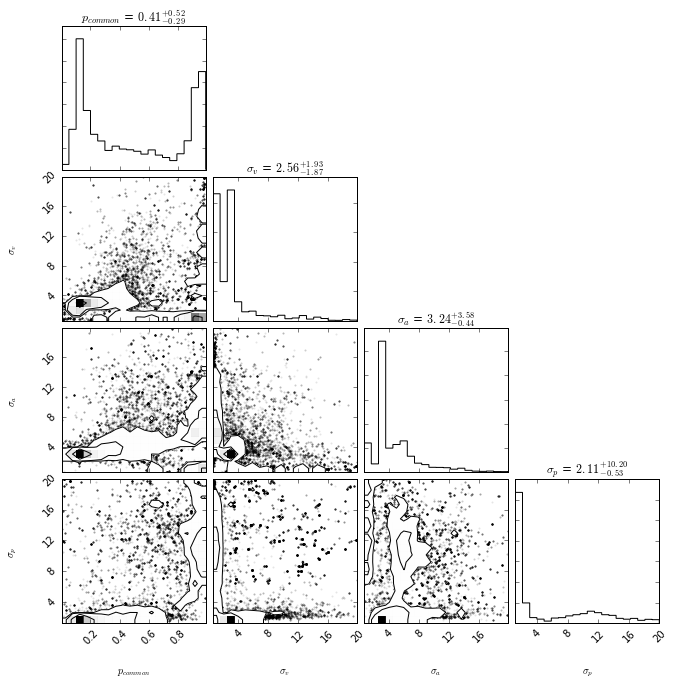

In [36]:
import corner

mcmc_data = np.load('mcmc.dump')
mean_vals = np.mean(mcmc_data, axis=0)
figure = corner.corner(np.load('mcmc.dump'), labels=['$p_{common}$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'],show_titles=True, title_kwargs={"fontsize": 12})
print('The mean values for p_common: {0:.2f}, sigma_v: {1:.2f}, sigma_a:{2:.2f}, sigma_p:{3:.2f}'.format(mean_vals[0], mean_vals[1], mean_vals[2], mean_vals[3]))

### 2.h

### 2.i

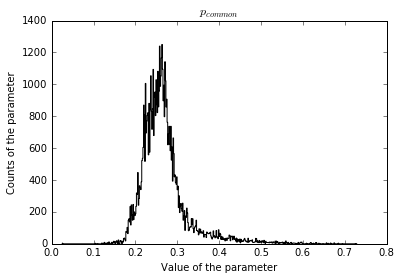

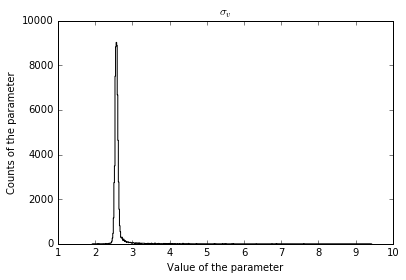

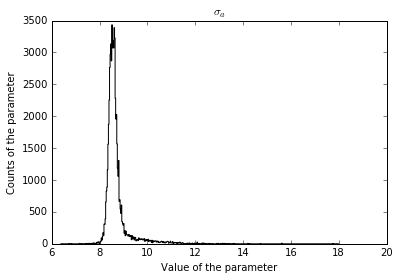

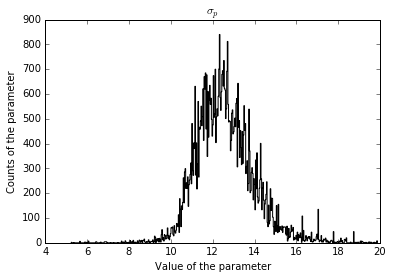

The mean values for p_common: 0.27, sigma_v: 2.61, sigma_a:8.69, sigma_p:12.60


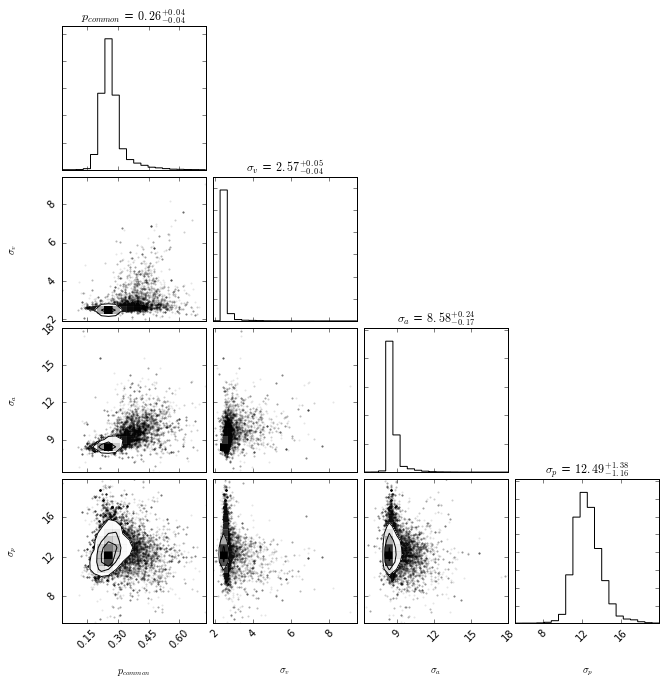

In [38]:
N = int(1e4)

true_params = lambda: None
true_params.p_common = 0.3
true_params.sigma_v = 2.1
true_params.sigma_a = 9
true_params.sigma_p = 12
true_params.mu_p = 0

cs = np.sign(np.random.rand(N) - true_params.p_common) / 2. + 1.5  # only consists of 1s and 2s
is_class_1 = np.isclose(cs, 1.)
s_samples = np.random.normal(true_params.mu_p, true_params.sigma_p, (N, 2))

s_vs = s_samples[:, 0]

s_as = np.zeros((N,))
s_as[is_class_1] = s_samples[is_class_1, 0]
s_as[np.logical_not(is_class_1)] = s_samples[np.logical_not(is_class_1), 1]


s_as_discrete, _ = discretize_s(s_as)
s_vs_discrete, _ = discretize_s(s_vs)


estimated_s_vs, estimated_s_vs_index, estimated_s_as, estimated_s_as_index = generate_experiment_data(s_vs, s_as,
                                                                                                      true_params)
def calculate_log_likelihood_wrapper(param_arr):
    param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    if not np.all(np.logical_and(param_arr > param_limits[:,0], param_arr < param_limits[:,1])):
        return -10**300
    params = lambda: None
    params.p_common = param_arr[0]
    params.sigma_v = param_arr[1]
    params.sigma_a = param_arr[2]
    params.sigma_p = param_arr[3]
    params.mu_p = 0
    t = calculate_log_likelihood(s_vs_discrete, s_as_discrete, estimated_s_vs_index, estimated_s_as_index, params)
    if np.isnan(t):
        return -np.Inf
    else:
        return t
    
def mcmc(dump_name):
    ndim = 4
    # param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    nwalkers = ndim**4
    start = np.random.uniform(0.001,20,(nwalkers,ndim))
    start[:,0] = np.random.uniform(0,1,(nwalkers))
    sampler = emcee.EnsembleSampler(nwalkers, ndim, calculate_log_likelihood_wrapper)
    pos, prob, state = sampler.run_mcmc(start, 25)
    sampler.reset()
    sampler.run_mcmc(pos, 250)
    dimensions =['$p_{common}$', '$\sigma_v$','$\sigma_a$', '$\sigma_p$']
    for i in range(ndim):
        plt.figure()
        plt.hist(sampler.flatchain[:,i], 500, color="k", histtype="step")
        plt.title(dimensions[i])
        plt.xlabel('Value of the parameter')
        plt.ylabel('Counts of the parameter')
    plt.show()
    sampler.flatchain.dump(dump_name)
    
    mean_vals = np.mean(sampler.flatchain, axis=0)
    figure = corner.corner(sampler.flatchain, labels=['$p_{common}$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'],show_titles=True, title_kwargs={"fontsize": 12})
    print('The mean values for p_common: {0:.2f}, sigma_v: {1:.2f}, sigma_a:{2:.2f}, sigma_p:{3:.2f}'.format(mean_vals[0], mean_vals[1], mean_vals[2], mean_vals[3]))

mcmc('mcmc_case1.dump')


/Users/erens/github_code/bayes_is_the_way/model.py:39: RuntimeWarning: invalid value encountered in true_divide
  + prior_C_equals_2(x_v, x_a, params) * (1 - params.p_common))
/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in true_divide
/Users/erens/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:80: RuntimeWarning: invalid value encountered in true_divide


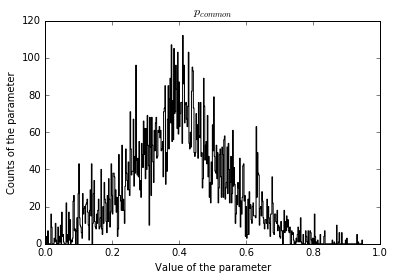

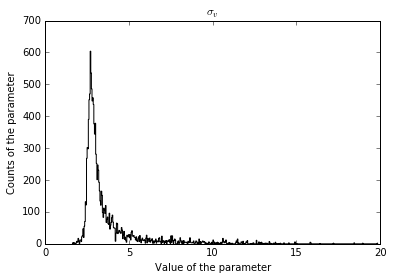

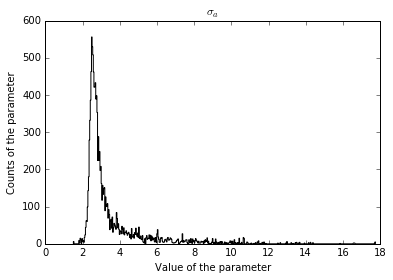

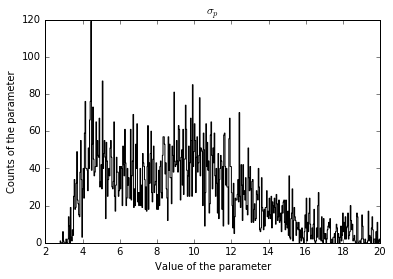

The mean values for p_common: 0.40, sigma_v: 3.61, sigma_a:3.42, sigma_p:9.25


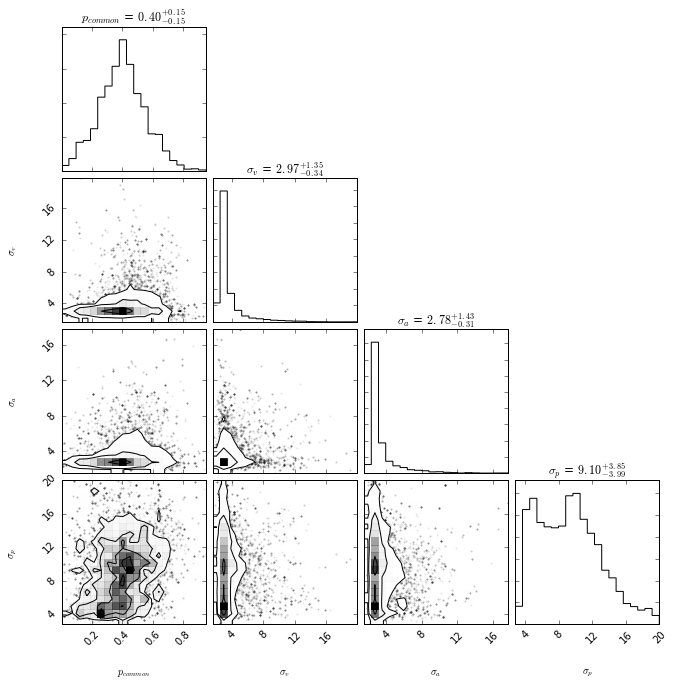

In [41]:
N = int(1e4)

true_params = lambda: None
true_params.p_common = 0.3
true_params.sigma_v = 2.1
true_params.sigma_a = 2
true_params.sigma_p = 12
true_params.mu_p = 0

cs = np.sign(np.random.rand(N) - true_params.p_common) / 2. + 1.5  # only consists of 1s and 2s
is_class_1 = np.isclose(cs, 1.)
s_samples = np.random.normal(true_params.mu_p, true_params.sigma_p, (N, 2))

s_vs = s_samples[:, 0]

s_as = np.zeros((N,))
s_as[is_class_1] = s_samples[is_class_1, 0]
s_as[np.logical_not(is_class_1)] = s_samples[np.logical_not(is_class_1), 1]


s_as_discrete, _ = discretize_s(s_as)
s_vs_discrete, _ = discretize_s(s_vs)


estimated_s_vs, estimated_s_vs_index, estimated_s_as, estimated_s_as_index = generate_experiment_data(s_vs, s_as,
                                                                                                      true_params)
def calculate_log_likelihood_wrapper(param_arr):
    param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    if not np.all(np.logical_and(param_arr > param_limits[:,0], param_arr < param_limits[:,1])):
        return -10**300
    params = lambda: None
    params.p_common = param_arr[0]
    params.sigma_v = param_arr[1]
    params.sigma_a = param_arr[2]
    params.sigma_p = param_arr[3]
    params.mu_p = 0
    t = calculate_log_likelihood(s_vs_discrete, s_as_discrete, estimated_s_vs_index, estimated_s_as_index, params)
    if np.isnan(t):
        return -np.Inf
    else:
        return t
    
def mcmc(dump_name):
    ndim = 4
    # param_limits = np.array([[0, 1], [0.001, 20], [0.001, 20], [0.001, 20]])
    nwalkers = ndim**4
    start = np.random.uniform(0.001,20,(nwalkers,ndim))
    start[:,0] = np.random.uniform(0,1,(nwalkers))
    sampler = emcee.EnsembleSampler(nwalkers, ndim, calculate_log_likelihood_wrapper)
    pos, prob, state = sampler.run_mcmc(start, 25)
    sampler.reset()
    sampler.run_mcmc(pos, 50)
    dimensions =['$p_{common}$', '$\sigma_v$','$\sigma_a$', '$\sigma_p$']
    for i in range(ndim):
        plt.figure()
        plt.hist(sampler.flatchain[:,i], 500, color="k", histtype="step")
        plt.title(dimensions[i])
        plt.xlabel('Value of the parameter')
        plt.ylabel('Counts of the parameter')
    plt.show()
    mean_vals = np.mean(sampler.flatchain, axis=0)
    figure = corner.corner(sampler.flatchain, labels=['$p_{common}$', '$\sigma_v$', '$\sigma_a$', '$\sigma_p$'],show_titles=True, title_kwargs={"fontsize": 12})
    print('The mean values for p_common: {0:.2f}, sigma_v: {1:.2f}, sigma_a:{2:.2f}, sigma_p:{3:.2f}'.format(mean_vals[0], mean_vals[1], mean_vals[2], mean_vals[3]))


mcmc('mcmc_case2.dump')
